In [28]:
#Registration Number: 1803123
#Importing all the required libraries
import warnings
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atlur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atlur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Dataset content (Reviews, collumns):  (50000, 2)

The look of the dataset:

<bound method NDFrame.describe of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

Review of the dataset destribution:



<Axes: xlabel='count', ylabel='sentiment'>

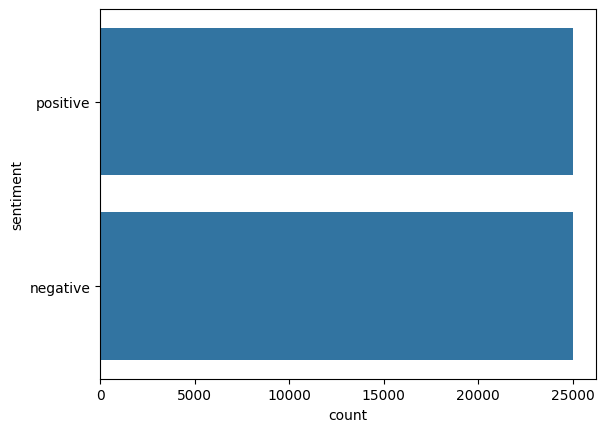

In [29]:
#1: Reading the file, incorporating the dataset into training and testing instances

#Read file
dataset = pd.read_csv("IMDB Dataset.csv")

print("Dataset content (Reviews, collumns): ", dataset.shape)
print("\nThe look of the dataset:\n")
print(dataset.describe)
print("\nReview of the dataset destribution:\n")
sns.countplot(dataset["sentiment"])

In [30]:
#Separate the dataset for training (40000) and testing (10000)
dataset_train, dataset_test, train_data_label, test_data_label = train_test_split(
dataset['review'],
dataset['sentiment'],
test_size = 0.20,
random_state = 42)
print("The shape of training dataset: 40,000 Reviews\nThe shape of testing dataset: 10,000 Reviews")

The shape of training dataset: 40,000 Reviews
The shape of testing dataset: 10,000 Reviews


In [31]:
#2: Pre-processing the raw text for further analysis and an increase in model performance

#Turn 'Positive' -> 1, and 'Negative' -> 0 for numerical representation
# train_data_label = (train_data_label.replace({
#     'positive': 1,
#     'negative': 0})).values
# test_data_label = (test_data_label.replace({
#     'positive': 1,
#     'negative': 0})).values
def numerical_label_conversion(data_label):
    return (data_label.replace({'positive': 1, 'negative': 0})).values
train_data_label = numerical_label_conversion(train_data_label)
test_data_label = numerical_label_conversion(test_data_label)

In [32]:
#Pre-process the data to increase performance
from bs4 import BeautifulSoup
import re
import nltk

# Download stopwords and wordnet if not already
nltk.download('stopwords')
nltk.download('wordnet')

pattern = re.compile(r'[^a-zA-Z]')

# Pre-process the data to increase performance
def process_data(dataset):
    stopwords = nltk.corpus.stopwords.words('english')
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    # remove punctuation
    def remove_punctuation(review):
        return pattern.sub(' ', review)
    
    # lemmatize words
    def lemmatize(words):
        return ' '.join(lemmatizer.lemmatize(word) for word in words)
    
    # filter stopwords
    def filter_stopwords(words):
        return filter(lambda word: word not in stopwords, words)

    def process_review(review):
        # Remove HTML tags and convert to lowercase
        review = BeautifulSoup(review, 'html.parser').get_text().lower()
        # Remove punctuation and non-alphabetic characters
        review = remove_punctuation(review)
        # Tokenize
        review = review.split()
        # Remove stopwords
        review = filter_stopwords(review)
        # Lemmatize
        review = lemmatize(review)
        return review

    return [process_review(review) for review in dataset]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atlur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atlur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
#3: Analysing the feature of the training set, report the linguistic features of the training dataset.
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load dataset
dataset = pd.read_csv(r"C:\Users\atlur\OneDrive\Desktop\IMDB Dataset.csv")

# 2. Split into train/test
dataset_train, dataset_test, train_data_label, test_data_label = train_test_split(
    dataset['review'], dataset['sentiment'].map({'positive': 1, 'negative': 0}),
    test_size=0.2, random_state=42
)

# 3. Apply preprocessing (make sure process_data function is fixed as we discussed earlier)
corpus_train = process_data(dataset_train)
corpus_test = process_data(dataset_test)


In [34]:
#4: Building a text classification model, training the model on the training set and testing the model on the test set

#TfidfVectorization of the training and testing set

def vectorize_corpus(corpus_train, corpus_test, ngram_range=(1, 3)):
    tfidf_vec = TfidfVectorizer(ngram_range=ngram_range)
    tfidf_vec_train = tfidf_vec.fit_transform(corpus_train)
    tfidf_vec_test = tfidf_vec.transform(corpus_test)
    return tfidf_vec_train, tfidf_vec_test
tfidf_vec_train, tfidf_vec_test = vectorize_corpus(corpus_train, corpus_test)

In [35]:
# #Building the model
# linear_svc = LinearSVC(C=0.5, random_state=42)
# linear_svc.fit(tfidf_vec_train, train_data_label)

# #Retrieving the accuracy prediction
# predict = linear_svc.predict(tfidf_vec_test)
# acc_score = accuracy_score(test_data_label, predict)

def train_classifier(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)
    return classifier

def evaluate_classifier(classifier, X_test, y_test):
    predict = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, predict)
    return predict, acc_score

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc = train_classifier(linear_svc, tfidf_vec_train, train_data_label)
predict, acc_score = evaluate_classifier(linear_svc, tfidf_vec_test, test_data_label)

LinearSVC Classifier Accuracy: 90.18%

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.92      0.88      0.90      4961
    Positive       0.89      0.92      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


 Confusion Matrix: 


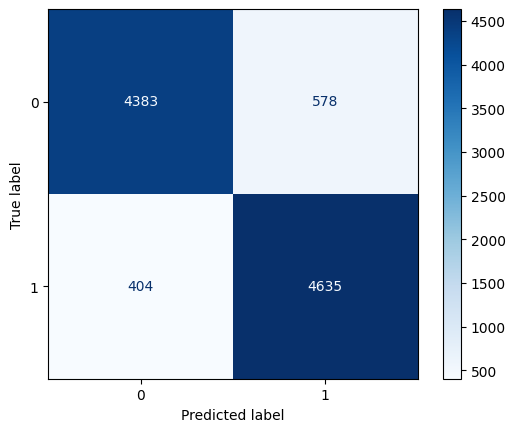

In [36]:
#5: Summarizing the performance of the model

#Print out the accuracy score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Print out the accuracy score
print("LinearSVC Classifier Accuracy:", "{:.2f}%\n".format(100*acc_score))

# Print classification report
print("Classification Report: \n", classification_report(test_data_label, predict, target_names=['Negative','Positive']))

# Plot confusion matrix (new way)
print("\n Confusion Matrix: ")
ConfusionMatrixDisplay.from_estimator(linear_svc, tfidf_vec_test, test_data_label, cmap='Blues')

plt.grid(False)
plt.show()



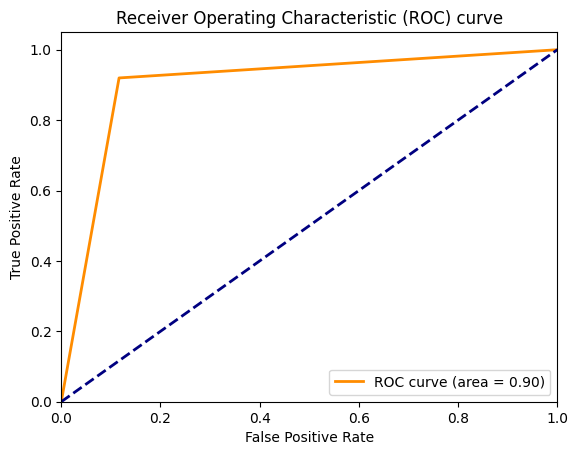

In [37]:
#Plotting other graphs such as ROC Curve, Learning Curve and Precision-Recall Curve
from sklearn.metrics import roc_curve, auc

#ROC Curve (trade-off between sensitivity and spesificity)
fpr, tpr, _ = roc_curve(test_data_label, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

#graph spesifics
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

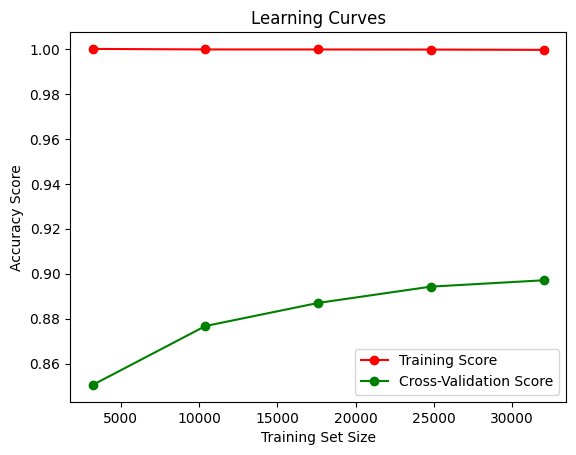

In [38]:
from sklearn.model_selection import learning_curve

#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(linear_svc, 
                                                        tfidf_vec_train, 
                                                        train_data_label,
                                                        cv=5,
                                                        scoring='accuracy')
#Learning messures
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")

plt.show()

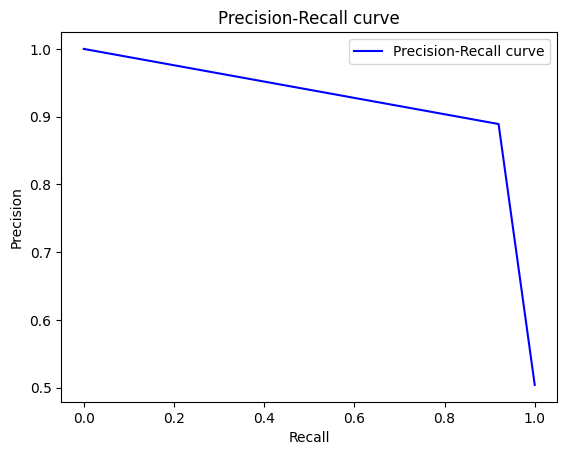

In [39]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(test_data_label, predict)

plt.figure()
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()

In [40]:
#Bonus: Sneak peak into model prediction to conclude its performance

#raw data review; copy and reshape accordingly
actual_review = pd.DataFrame(dataset_test.copy())

#Clean and reset the index
actual_review.columns = ['Review']
actual_review = actual_review.reset_index()
actual_review = actual_review.drop(['index'], axis=1)

def sentiment_copy_format(data, column):
    sentiment = data.copy()
    sentiment = pd.DataFrame(sentiment)
    sentiment.columns = [column]
    sentiment[column] = sentiment[column].replace({1: 'Positive', 0: 'Negative'})
    return sentiment

actual_sentiment = sentiment_copy_format(test_data_label, 'Sentiment')
predic_sentiment = sentiment_copy_format(predict, 'Predicted Sentiment')

test_result = pd.concat([actual_review, actual_sentiment, predic_sentiment], axis=1)
test_result.head()

,Review,Sentiment,Predicted Sentiment
0,I really liked this Summerslam due to the look...,NaN,Negative
1,Not many television shows appeal to quite as m...,NaN,Positive
2,The film quickly gets to a major chase scene w...,NaN,Negative
3,Jane Austen would definitely approve of this o...,NaN,Positive
4,Expectations were somewhat high for me when I ...,Positive,Negative
